In [0]:
! pip install --upgrade Cython
! pip install --upgrade git+https://github.com/statsmodels/statsmodels


     |████████████████████████████████| 2.1MB 5.0MB/s 
  Found existing installation: Cython 0.29.9
    Uninstalling Cython-0.29.9:
      Successfully uninstalled Cython-0.29.9
  Cloning https://github.com/statsmodels/statsmodels to /tmp/pip-req-build-bit1dp0e
  Running command git clone -q https://github.com/statsmodels/statsmodels /tmp/pip-req-build-bit1dp0e
  Stored in directory: /tmp/pip-ephem-wheel-cache-evj9gvv8/wheels/7d/ad/45/ac1a03bd759c2fa74c486e2b1950d94b55f511b4c2b0418bd5
Successfully built statsmodels
  Found existing installation: statsmodels 0.9.0
    Uninstalling statsmodels-0.9.0:
      Successfully uninstalled statsmodels-0.9.0


In [0]:
!pip install PyDrive

     |████████████████████████████████| 993kB 4.6MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [0]:
import os 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import datetime
import statsmodels.api as sm
import pandas as pd
import json
import numpy as np

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({'id': '1lGtCEM-xnHGdjam4JKgzEzgHtXjWQB_1'})
download.GetContentFile('Data.zip')


In [0]:
!unzip Data.zip

Archive:  Data.zip
  inflating: ECE219_tweet_data/tweets_#gohawks.txt  
  inflating: ECE219_tweet_data/tweets_#gopatriots.txt  
  inflating: ECE219_tweet_data/tweets_#nfl.txt  
  inflating: ECE219_tweet_data/tweets_#patriots.txt  
  inflating: ECE219_tweet_data/tweets_#sb49.txt  
  inflating: ECE219_tweet_data/tweets_#superbowl.txt  


In [2]:
# before_time=datetime.datetime(2015,2,1,8)
# after_time= datetime.datetime(2015,2,1,20)

import pytz
import numpy as np
from datetime import timedelta


pst_tz = pytz.timezone('America/Los_Angeles')

# min_tweet_time= np.min(tweet_time)
pstTimeDelta    = datetime.timedelta(hours=-8)
tzObject        = datetime.timezone(pstTimeDelta, name="PST")

before_time=datetime.datetime(2015,2,1,8,0,0,0,tzObject)
after_time= datetime.datetime(2015,2,1,20,0,0,0,tzObject)


Total_tweet=0
tweet_time=[]
follow_count=[]
retweet_count=[]
status_count=[]
hashtag_count=[]
friends_count=[]
mentions_TF=[]
favourites_count=[]
url_ratio_count=[]



tweet_time_after=[]
follow_count_after=[]
retweet_count_after=[]
status_count_after=[]
hashtag_count_after=[]
friends_count_after=[]
mentions_TF_after=[]
favourites_count_after=[]
url_ratio_count_after=[]


tweet_time_before=[]
follow_count_before=[]
retweet_count_before=[]
status_count_before=[]
hashtag_count_before=[]
friends_count_before=[]
mentions_TF_before=[]
favourites_count_before=[]
url_ratio_count_before=[]

with open('./ECE219_tweet_data/tweets_#superbowl.txt','r') as f:
#   read_data= f.read()
  for line in f:
    json_object=json.loads(line)
    Total_tweet += 1
    conv_datetime_object = datetime.datetime.fromtimestamp(json_object['citation_date'],pst_tz)
    
    #################During SuperBowl
    if ((before_time-conv_datetime_object).total_seconds()/(60*60) <=0) and ((conv_datetime_object-after_time).total_seconds()/(60*60))<0: 
      follow_count.append(json_object['author']['followers'])
      retweet_count.append(json_object['metrics']['citations']['total'])
      tweet_time.append(json_object['citation_date'])
      ### new features:
      status_count.append(json_object['tweet']['user']['statuses_count'])
      hashtag_count.append(len(json_object['tweet']['entities']['hashtags']))
      friends_count.append(json_object['tweet']['user']['friends_count'])
      if not json_object['tweet']['entities']['user_mentions'] :
        mentions_TF.append(0)
      else:
        mentions_TF.append(1)
      url_ratio_count.append(len(json_object['tweet']['entities']['urls']))
      favourites_count.append(json_object['tweet']['user']['favourites_count']) 
      
      
     #######After SuperBOWL 
    if (conv_datetime_object- after_time).total_seconds()/(60*60) >=0:
      follow_count_after.append(json_object['author']['followers'])
      retweet_count_after.append(json_object['metrics']['citations']['total'])
      tweet_time_after.append(json_object['citation_date'])
      ### new features:
      status_count_after.append(json_object['tweet']['user']['statuses_count'])
      hashtag_count_after.append(len(json_object['tweet']['entities']['hashtags']))
      friends_count_after.append(json_object['tweet']['user']['friends_count'])
      if not json_object['tweet']['entities']['user_mentions'] :
        mentions_TF_after.append(0)
      else:
        mentions_TF_after.append(1)
      url_ratio_count_after.append(len(json_object['tweet']['entities']['urls']))
      favourites_count_after.append(json_object['tweet']['user']['favourites_count']) 
    ###########Before SuperBowl
    if (before_time-conv_datetime_object).total_seconds()/(60*60) >0:  
      follow_count_before.append(json_object['author']['followers'])
      retweet_count_before.append(json_object['metrics']['citations']['total'])
      tweet_time_before.append(json_object['citation_date'])
      ### new features:
      status_count_before.append(json_object['tweet']['user']['statuses_count'])
      hashtag_count_before.append(len(json_object['tweet']['entities']['hashtags']))
      friends_count_before.append(json_object['tweet']['user']['friends_count'])
      if not json_object['tweet']['entities']['user_mentions'] :
        mentions_TF_before.append(0)
      else:
        mentions_TF_before.append(1)
      url_ratio_count_before.append(len(json_object['tweet']['entities']['urls']))
      favourites_count_before.append(json_object['tweet']['user']['favourites_count']) 
    
    
    
    
    
    

    

f.closed

True

**Before**

In [8]:
import pytz
import numpy as np
from datetime import timedelta
pst_tz = pytz.timezone('America/Los_Angeles')

mint_before=datetime.datetime.fromtimestamp(np.min(tweet_time_before),pst_tz)
maxt_before=datetime.datetime.fromtimestamp(np.max(tweet_time_before),pst_tz)
timerange_before=maxt_before-mint_before
print(timerange_before)
minute_of_min_before= datetime.datetime.fromtimestamp(np.min(tweet_time_before), pst_tz).minute
second_of_min_before= datetime.datetime.fromtimestamp(np.min(tweet_time_before), pst_tz).second
print(datetime.datetime.fromtimestamp(np.min(tweet_time_before), pst_tz))
timeD=timedelta(hours=0, minutes=minute_of_min_before,seconds= second_of_min_before)
print(timedelta(hours=0, minutes=minute_of_min_before,seconds= second_of_min_before))
print(datetime.datetime.fromtimestamp(np.min(tweet_time_before), pst_tz)-timeD)



min_time_conv_before=datetime.datetime.fromtimestamp(np.min(tweet_time_before),pst_tz)-timeD
tweet_window_before=[]
for element in tweet_time_before:
  element_conv= datetime.datetime.fromtimestamp(element,pst_tz)
  
  bin_index=(element_conv-min_time_conv_before).total_seconds()/(60*60)
#   print(element_conv,datetime.datetime.fromtimestamp(sortTime[0]))
#   print(int(bin_index))
  tweet_window_before.append(int(bin_index))
# tweet_window_before

18 days, 7:46:52
2015-01-14 00:13:07-08:00
0:13:07
2015-01-14 00:00:00-08:00


In [0]:
retweet_array_window_before=[]
for i in range(np.max(tweet_window_before)+1):
#   print(np.where(np.asarray(tweet_window,dtype=int)==i))
  retweet_array_window_before.append(np.where(np.asarray(tweet_window_before,dtype=int)==i))
#   break

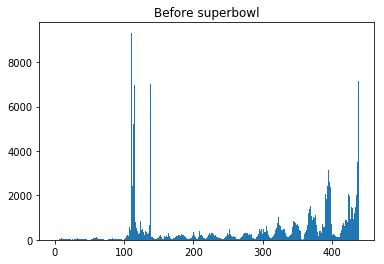

In [10]:
import matplotlib.pyplot as plt
plt.figure()
plt.hist(tweet_window_before, bins=int(np.max(tweet_window_before)) +1)
plt.title('Before superbowl')
plt.show()

In [11]:
# print(retweet_array_window[0][0][0])
# print(retweet_array_window)
my_retweet_count_before=[]
my_follow_count_before=[]
my_max_follower_count_before=[]
my_time_of_day_before=[]
for element in retweet_array_window_before:
  for innerelement in element:
#     print(innerelement)[]
    item=0
    item1=0
    maxitem2=0
    timeitem=0
    for indexlayer in innerelement:
      item=retweet_count_before[indexlayer]+item
      item1=follow_count_before[indexlayer]+item1
      timeitem=datetime.datetime.fromtimestamp(tweet_time_before[indexlayer], pst_tz).hour
      if maxitem2 < follow_count_before[indexlayer]:
        maxitem2= follow_count_before[indexlayer]
    my_time_of_day_before.append(timeitem)   
    my_max_follower_count_before.append(maxitem2)  
    my_retweet_count_before.append(item)
    my_follow_count_before.append(item1)
      


n_tweet_before= np.histogram(tweet_window_before,bins=int(np.ceil(timerange_before.total_seconds()/(60*60))))
print(len(n_tweet_before[0]))            
print(len(my_retweet_count_before))
print(len(my_follow_count_before))
print(len(my_max_follower_count_before))
print(len(my_time_of_day_before))

df = pd.DataFrame({
    '# of Tweets' : n_tweet_before[0],
    '# of retweets' : my_retweet_count_before,
    'Sum n followers': my_follow_count_before,
    'Max followers': my_max_follower_count_before,
    'Time of day': my_time_of_day_before
    }, columns = ['# of Tweets', '# of retweets', 'Sum n followers', 'Max followers', 'Time of day'])

440
440
440
440
440


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     58.26
Date:                Sun, 09 Jun 2019   Prob (F-statistic):           2.63e-46
Time:                        21:29:05   Log-Likelihood:                -3510.1
No. Observations:                 439   AIC:                             7032.
Df Residuals:                     433   BIC:                             7057.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        146.5575     69.067      2.122      0.0

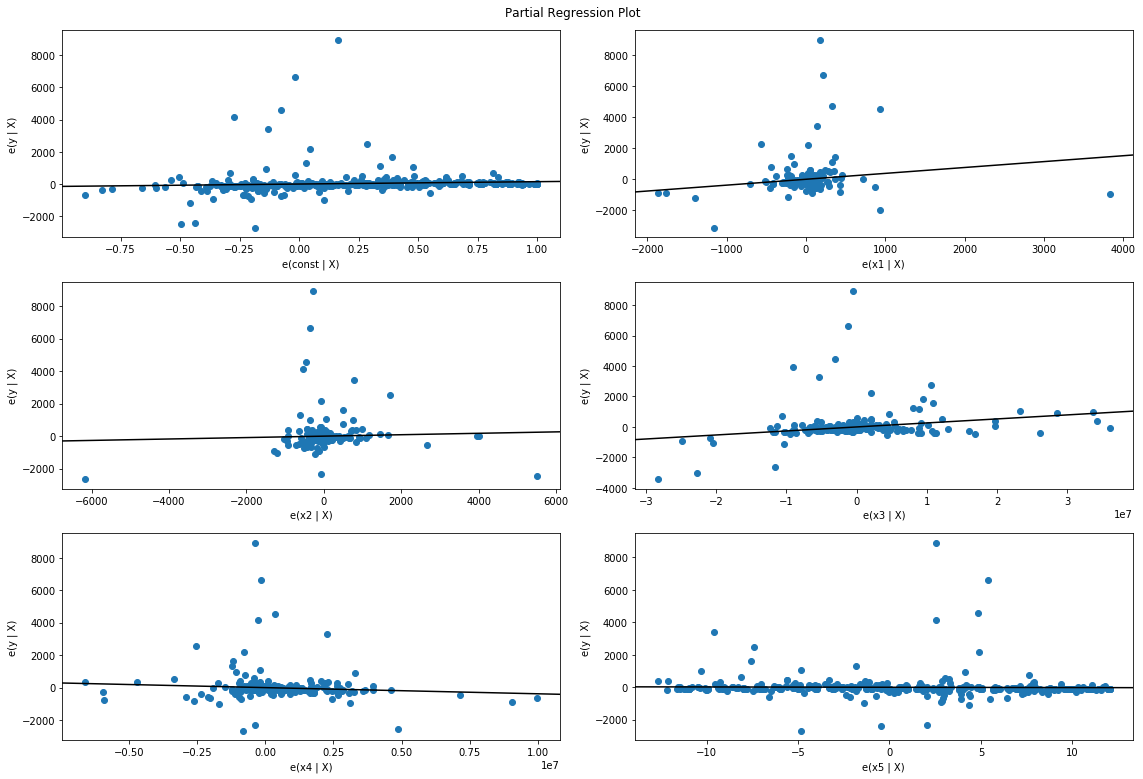

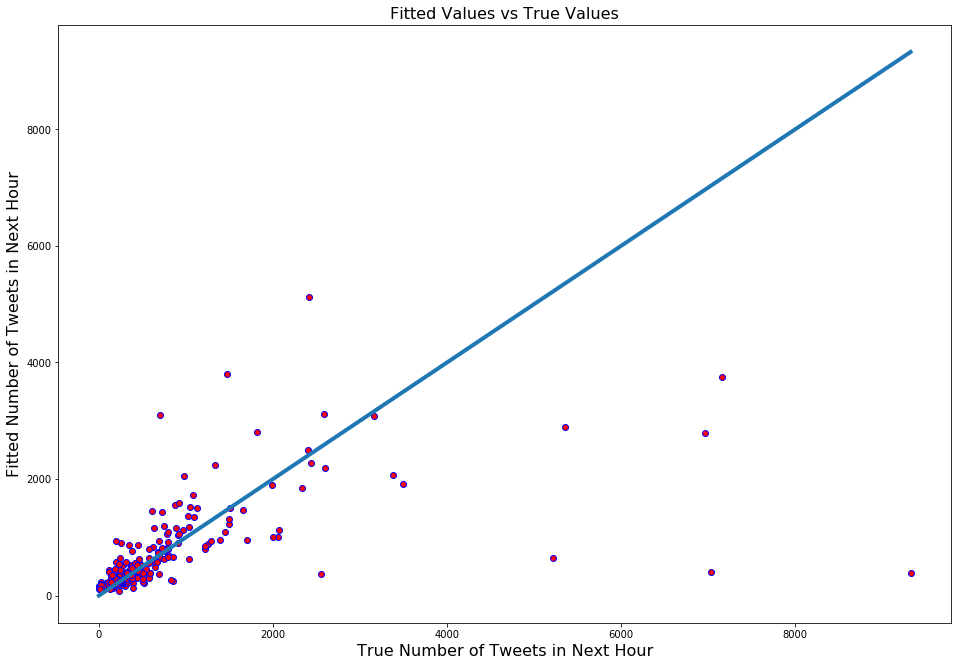

In [12]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
input_arr = []
for index in df.index:
    input_arr.append(df.loc[index, '# of Tweets':'Time of day'].values)
input_arr.pop()#delete last row
input_arr = sm.add_constant(input_arr)
# print(input_arr)
output_arr = df.loc[df.index[1]:, '# of Tweets'].values #from second row to last row
# print(output_arr)

# input_arr, input_arr, output_arr, output_arr = train_test_split(input_arr, output_arr, test_size=0.1, random_state=42,shuffle=False)

model = sm.OLS(output_arr, input_arr)
results = model.fit()
output_predicted = results.predict(input_arr)
def rmse(predictions, targets):
    return ((predictions - targets) ** 2).mean()

res = model.fit()

print(res.summary())
print('#'*50)

print("MSE= ", (rmse(output_predicted, output_arr)))
print("RMSE= ", np.sqrt(rmse(output_predicted, output_arr)))
print('#'*50)
print("T-values:")
for i in range(len(res.tvalues)):
  print('column',i+1,res.tvalues[i])
print('#'*50)
print("P-Values: ")
for i in range(len(res.pvalues)):
  print('column',i+1,res.pvalues[i])
print('#'*50)

fig = plt.figure(figsize=(16,11))
fig = sm.graphics.plot_partregress_grid(results, fig=fig)
fig.show()
# plot fitted values vs true values
plt.figure(figsize=(16,11))
plt.scatter(output_arr, output_predicted, color='red', edgecolors='b')
plt.plot([output_arr.min(), output_arr.max()], [output_arr.min(), output_arr.max()], lw=4)
plt.ylabel('Fitted Number of Tweets in Next Hour', fontsize = 16)
plt.xlabel('True Number of Tweets in Next Hour', fontsize = 16)
plt.title('Fitted Values vs True Values', fontsize = 16)
plt.show()

**During SuperBowl**

In [13]:


import pytz
import numpy as np
from datetime import timedelta


pst_tz = pytz.timezone('America/Los_Angeles')

# min_tweet_time= np.min(tweet_time)
pstTimeDelta    = datetime.timedelta(hours=-8)
tzObject        = datetime.timezone(pstTimeDelta, name="PST")

before_time=datetime.datetime(2015,2,1,8,0,0,0,tzObject)
after_time= datetime.datetime(2015,2,1,20,0,0,0,tzObject)


mint=datetime.datetime.fromtimestamp(np.min(tweet_time),pst_tz)
maxt=datetime.datetime.fromtimestamp(np.max(tweet_time),pst_tz)
timerange=maxt-mint
print("True range in hour: ",timerange.total_seconds()/(60*60))
total_time_range= timerange.total_seconds()/(60*60)
print("Average number of tweets per hour", len(tweet_time)/total_time_range)







pst_tz = pytz.timezone('America/Los_Angeles')

min_tweet_time= np.min(tweet_time)



minute_of_min= datetime.datetime.fromtimestamp(min_tweet_time, pst_tz).minute
second_of_min= datetime.datetime.fromtimestamp(min_tweet_time, pst_tz).second

timeD=timedelta(hours=0, minutes=minute_of_min,seconds= second_of_min)
# print(timedelta(hours=0, minutes=minute_of_min,seconds= second_of_min))
# print(datetime.datetime.fromtimestamp(min_tweet_time, pst_tz)-timeD)
import time


time.sleep( 5 )

arbTime1=datetime.datetime(2015,2,1,8,0,0,0,tzObject)
arbTime2=datetime.datetime(2015,2,1,8,0,0,0,tzObject)
arbTime3=datetime.datetime(2015,2,1,9,0,0,0,tzObject)
arbTime4=datetime.datetime(2015,2,1,8,0,0,0,tzObject)
arbTime5= datetime.datetime(2015,2,1,19,59,0,0,tzObject)
arbTime6= datetime.datetime(2015,2,1,19,0,0,0,tzObject)
arbTime7= datetime.datetime(2015,2,1,8,0,0,0,tzObject)

some_arb_time= [arbTime1, arbTime2, arbTime3, arbTime4,arbTime5,arbTime6,arbTime7]


min_time_conv=datetime.datetime.fromtimestamp(min_tweet_time, pst_tz)-timeD
print(min_time_conv)

tweet_window=[]
for element in tweet_time:
  element_conv= datetime.datetime.fromtimestamp(element,pst_tz)
  
#   bin_index=(element_conv-min_time_conv).total_seconds()/(60*60)
#   print(element_conv,datetime.datetime.fromtimestamp(sortTime[0]))
#   print(int(bin_index))
  tweet_window.append((int(element_conv.hour-8)*12)+(int(element_conv.minute/5)))
#   print('#'*10)
#   print(element_conv)
#   print((int(element_conv.hour-8)*12)+(int(element_conv.minute/5)))
#   time.sleep( 3 )
  
# print(len(tweet_window))  
# print(np.max(tweet_window))
# print((tweet_window))
# np.where(np.asarray(tweet_window,dtype=int)==0)
retweet_array_window=[]
for i in range(np.max(tweet_window)+1):
#   print(np.where(np.asarray(tweet_window,dtype=int)==i))
  retweet_array_window.append(np.where(np.asarray(tweet_window,dtype=int)==i))
#   break

True range in hour:  11.999722222222223
Average number of tweets per hour 76998.199032385
2015-02-01 08:00:00-08:00


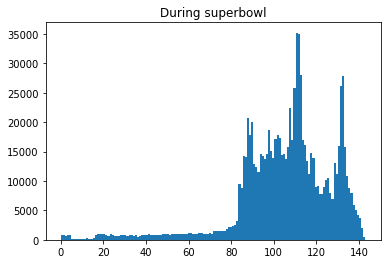

In [14]:
plt.figure()
# print(int(np.ceil(timerange.total_seconds()/(60*60))))
plt.hist(tweet_window, bins=144 )
plt.title('During superbowl')
plt.show()

In [15]:
# (int(element.hour-8)*12)+(int(element.minute/5))
print(element_conv)
print((element_conv.hour)*12)
print(int(element_conv.minute/5))
print(int(((element_conv.hour)*12)+(element_conv.minute/5)))
print(maxt)

2015-02-01 19:59:59-08:00
228
11
239
2015-02-01 19:59:59-08:00


In [16]:
# print(retweet_array_window[0][0][0])
# print(retweet_array_window)
my_retweet_count=[]
my_follow_count=[]
my_max_follower_count=[]
my_time_of_day=[]

my_status_count=[] #get how many status in certain hour
my_hashtag_count=[] #get how many hashtags in certain hour
my_friends_count=[] #max friend count
my_mentions_TF=[] #
my_favourites_count=[]

for element in retweet_array_window:
  for innerelement in element:
#     print(innerelement)[]
    item=0
    item1=0
    maxitem2=0
    timeitem=0
    
    item_status=0
    item_hashtag=0
    item_friends=0
    item_mentions=0
    item_favourites=0
    for indexlayer in innerelement:
      item=retweet_count[indexlayer]+item
      item1=follow_count[indexlayer]+item1
      timeitem=datetime.datetime.fromtimestamp(tweet_time[indexlayer], pst_tz).hour
      
      item_status= status_count[indexlayer]+ item_status
      item_hashtag=hashtag_count[indexlayer]+ item_hashtag
      item_friends=item_friends+ friends_count[indexlayer]
      item_mentions=item_mentions+ mentions_TF[indexlayer]
      item_favourites=item_favourites+ favourites_count[indexlayer]
      
      
      
      
      if maxitem2 < follow_count[indexlayer]:
        maxitem2= follow_count[indexlayer]
    my_time_of_day.append(timeitem)   
    my_max_follower_count.append(maxitem2)  
    my_retweet_count.append(item)
    my_follow_count.append(item1)
    
    my_status_count.append(item_status)
    my_hashtag_count.append(item_hashtag)
    my_friends_count.append(item_friends)
    my_mentions_TF.append(item_mentions)
    my_favourites_count.append(item_favourites)

n_tweet= np.histogram(tweet_window,bins=144)
print(len(n_tweet[0]))            
print(len(my_retweet_count))
print(len(my_follow_count))
print(len(my_max_follower_count))
print(len(my_time_of_day))

df = pd.DataFrame({
    '# of Tweets' : n_tweet[0],
    '# of retweets' : my_retweet_count,
    'Sum n followers': my_follow_count,
    'Max followers': my_max_follower_count,
    'Mentions': my_mentions_TF,
    'Status': my_status_count,
    'Hashtags': my_hashtag_count,
    'Friends': my_friends_count,
    'Favourites': my_favourites_count,
    'Time of day': my_time_of_day
    }, columns = ['# of Tweets', 
                  '# of retweets', 
                  'Sum n followers', 
                  'Max followers', 
                  'Mentions',
                  'Status', 
                  'Hashtags', 
                  'Friends', 
                  'Favourites',
                  'Time of day'])
# x=[n_tweet[0], my_retweet_count, my_follow_count, my_max_follower_count, my_status_count,my_hashtag_count]

144
144
144
144
144


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     220.1
Date:                Sun, 09 Jun 2019   Prob (F-statistic):           3.42e-77
Time:                        21:32:34   Log-Likelihood:                -1281.0
No. Observations:                 143   AIC:                             2584.
Df Residuals:                     132   BIC:                             2616.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3278.1280    876.504     -3.740      0.0

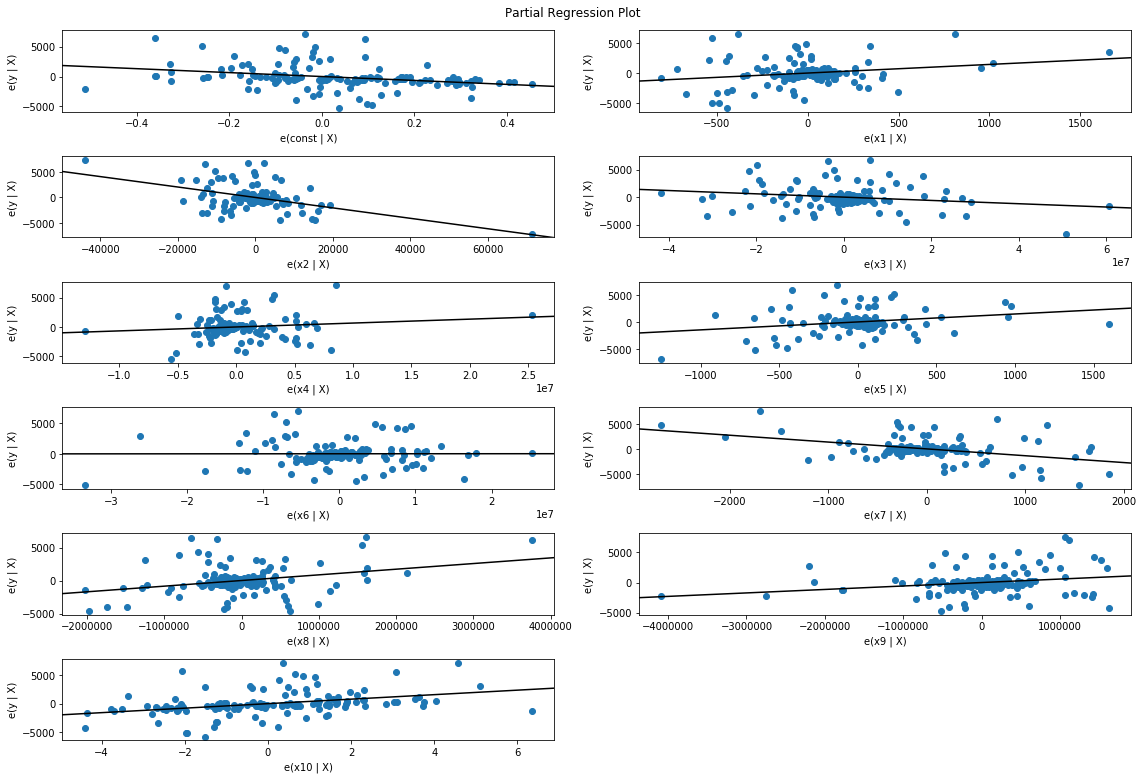

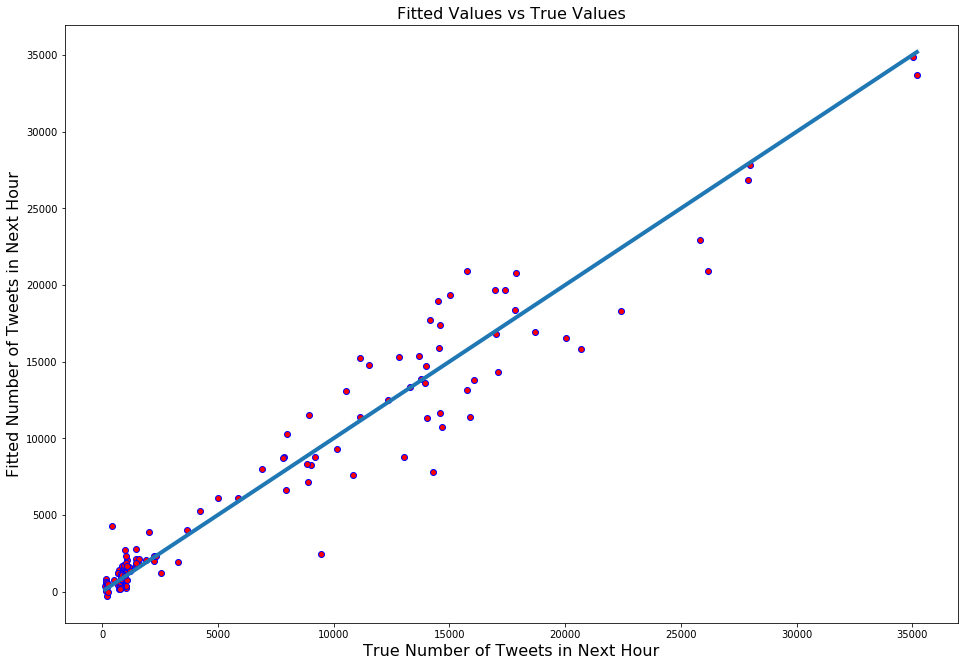

In [17]:
import matplotlib.pyplot as plt
input_arr = []
from sklearn.model_selection import train_test_split
input_arr = []
for index in df.index:
    input_arr.append(df.loc[index, '# of Tweets':'Time of day'].values)
input_arr.pop()#delete last row
input_arr = sm.add_constant(input_arr)
# print(input_arr)
output_arr = df.loc[df.index[1]:, '# of Tweets'].values #from second row to last row
# print(output_arr)

# input_arrinput_arrst, output_arr, output_arr = train_test_split(input_arr, output_arr, test_size=0.1, random_state=42,shuffle=False)

model = sm.OLS(output_arr, input_arr)
results = model.fit()
output_predicted = results.predict(input_arr)
def rmse(predictions, targets):
    return ((predictions - targets) ** 2).mean()

res = model.fit()

print(res.summary())
print('#'*50)

print("MSE= ", (rmse(output_predicted, output_arr)))
print("RMSE= ", np.sqrt(rmse(output_predicted, output_arr)))
print('#'*50)
print("T-values:")
for i in range(len(res.tvalues)):
  print('column',i+1,res.tvalues[i])
print('#'*50)
print("P-Values: ")
for i in range(len(res.pvalues)):
  print('column',i+1,res.pvalues[i])
print('#'*50)

fig = plt.figure(figsize=(16,11))
fig = sm.graphics.plot_partregress_grid(results, fig=fig)
fig.show()
# plot fitted values vs true values
plt.figure(figsize=(16,11))
plt.scatter(output_arr, output_predicted, color='red', edgecolors='b')
plt.plot([output_arr.min(), output_arr.max()], [output_arr.min(), output_arr.max()], lw=4)
plt.ylabel('Fitted Number of Tweets in Next Hour', fontsize = 16)
plt.xlabel('True Number of Tweets in Next Hour', fontsize = 16)
plt.title('Fitted Values vs True Values', fontsize = 16)
plt.show()

**After**

In [18]:

mint_after=datetime.datetime.fromtimestamp(np.min(tweet_time_after),pst_tz)
maxt_after=datetime.datetime.fromtimestamp(np.max(tweet_time_after),pst_tz)
print(mint_after)
print(maxt_after)
timerange_after=maxt_after-mint_after
print("True range in hour: ",timerange_after.total_seconds()/(60*60))
total_time_range_after= timerange_after.total_seconds()/(60*60)
print("Average number of tweets per hour", len(tweet_time)/total_time_range)







pst_tz = pytz.timezone('America/Los_Angeles')

min_tweet_time_after= np.min(tweet_time_after)



minute_of_min_after= datetime.datetime.fromtimestamp(min_tweet_time_after, pst_tz).minute
second_of_min_after= datetime.datetime.fromtimestamp(min_tweet_time_after, pst_tz).second

timeD_after=timedelta(hours=0, minutes=minute_of_min_after,seconds= second_of_min_after)
# print(timedelta(hours=0, minutes=minute_of_min,seconds= second_of_min))
# print(datetime.datetime.fromtimestamp(min_tweet_time, pst_tz)-timeD)

min_time_conv_after=datetime.datetime.fromtimestamp(min_tweet_time_after, pst_tz)-timeD_after
# print(min_time_conv)

tweet_window_after=[]
for element in tweet_time_after:
  element_conv_after= datetime.datetime.fromtimestamp(element, pst_tz)
  
  bin_index_after=(element_conv_after-min_time_conv_after).total_seconds()/(60*60)
#   print(element_conv,datetime.datetime.fromtimestamp(sortTime[0]))
#   print(int(bin_index))
  tweet_window_after.append(int(bin_index_after))
  
  
# print(np.max(tweet_window))
# print((tweet_window))
# np.where(np.asarray(tweet_window,dtype=int)==0)
retweet_array_window_after=[]
for i in range(np.max(tweet_window_after)+1):
#   print(np.where(np.asarray(tweet_window,dtype=int)==i))
  retweet_array_window_after.append(np.where(np.asarray(tweet_window_after,dtype=int)==i))
#   break

2015-02-01 20:00:02-08:00
2015-02-07 10:00:08-08:00
True range in hour:  134.00166666666667
Average number of tweets per hour 76998.199032385


135


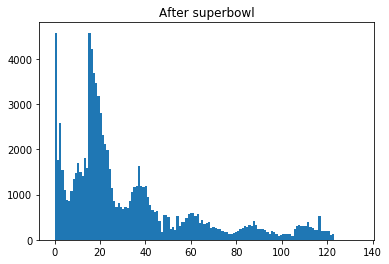

In [19]:
plt.figure()
print(int(np.ceil(timerange_after.total_seconds()/(60*60))))
plt.hist(tweet_window_after, bins=int(np.ceil(timerange_after.total_seconds()/(60*60))) )
plt.title('After superbowl')
plt.show()

In [20]:
# print(retweet_array_window[0][0][0])
# print(retweet_array_window)
my_retweet_count_after=[]
my_follow_count_after=[]
my_max_follower_count_after=[]
my_time_of_day_after=[]

my_status_count_after=[] #get how many status in certain hour
my_hashtag_count_after=[] #get how many hashtags in certain hour
my_friends_count_after=[] #max friend count
my_mentions_TF_after=[] #
my_favourites_count_after=[]

for element in retweet_array_window_after:
  for innerelement in element:
#     print(innerelement)[]
    item=0
    item1=0
    maxitem2=0
    timeitem=0
    
    item_status=0
    item_hashtag=0
    item_friends=0
    item_mentions=0
    item_favourites=0
    for indexlayer in innerelement:
      item=retweet_count_after[indexlayer]+item
      item1=follow_count_after[indexlayer]+item1
      timeitem=datetime.datetime.fromtimestamp(tweet_time_after[indexlayer], pst_tz).hour
      
      item_status= status_count_after[indexlayer]+ item_status
      item_hashtag=hashtag_count_after[indexlayer]+ item_hashtag
      item_friends=item_friends+ friends_count_after[indexlayer]
      item_mentions=item_mentions+ mentions_TF_after[indexlayer]
      item_favourites=item_favourites+ favourites_count_after[indexlayer]
      
      
      
      
      if maxitem2 < follow_count_after[indexlayer]:
        maxitem2= follow_count_after[indexlayer]
    my_time_of_day_after.append(timeitem)   
    my_max_follower_count_after.append(maxitem2)  
    my_retweet_count_after.append(item)
    my_follow_count_after.append(item1)
    
    my_status_count_after.append(item_status)
    my_hashtag_count_after.append(item_hashtag)
    my_friends_count_after.append(item_friends)
    my_mentions_TF_after.append(item_mentions)
    my_favourites_count_after.append(item_favourites)

n_tweet_after= np.histogram(tweet_window,bins=int(np.ceil(timerange_after.total_seconds()/(60*60))))
print(len(n_tweet_after[0]))            
print(len(my_retweet_count_after))
print(len(my_follow_count_after))
print(len(my_max_follower_count_after))
print(len(my_time_of_day_after))

df = pd.DataFrame({
    '# of Tweets' : n_tweet_after[0],
    '# of retweets' : my_retweet_count_after,
    'Sum n followers': my_follow_count_after,
    'Max followers': my_max_follower_count_after,
    'Mentions': my_mentions_TF_after,
    'Status': my_status_count_after,
    'Hashtags': my_hashtag_count_after,
    'Friends': my_friends_count_after,
    'Favourites': my_favourites_count_after,
    'Time of day': my_time_of_day_after
    }, columns = ['# of Tweets', 
                  '# of retweets', 
                  'Sum n followers', 
                  'Max followers', 
                  'Mentions',
                  'Status', 
                  'Hashtags', 
                  'Friends', 
                  'Favourites',
                  'Time of day'])
# x=[n_tweet[0], my_retweet_count, my_follow_count, my_max_follower_count, my_status_count,my_hashtag_count]

135
135
135
135
135


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     31.19
Date:                Sun, 09 Jun 2019   Prob (F-statistic):           3.49e-29
Time:                        21:33:15   Log-Likelihood:                -1321.3
No. Observations:                 134   AIC:                             2665.
Df Residuals:                     123   BIC:                             2697.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1704.0668   1229.178      1.386      0.1

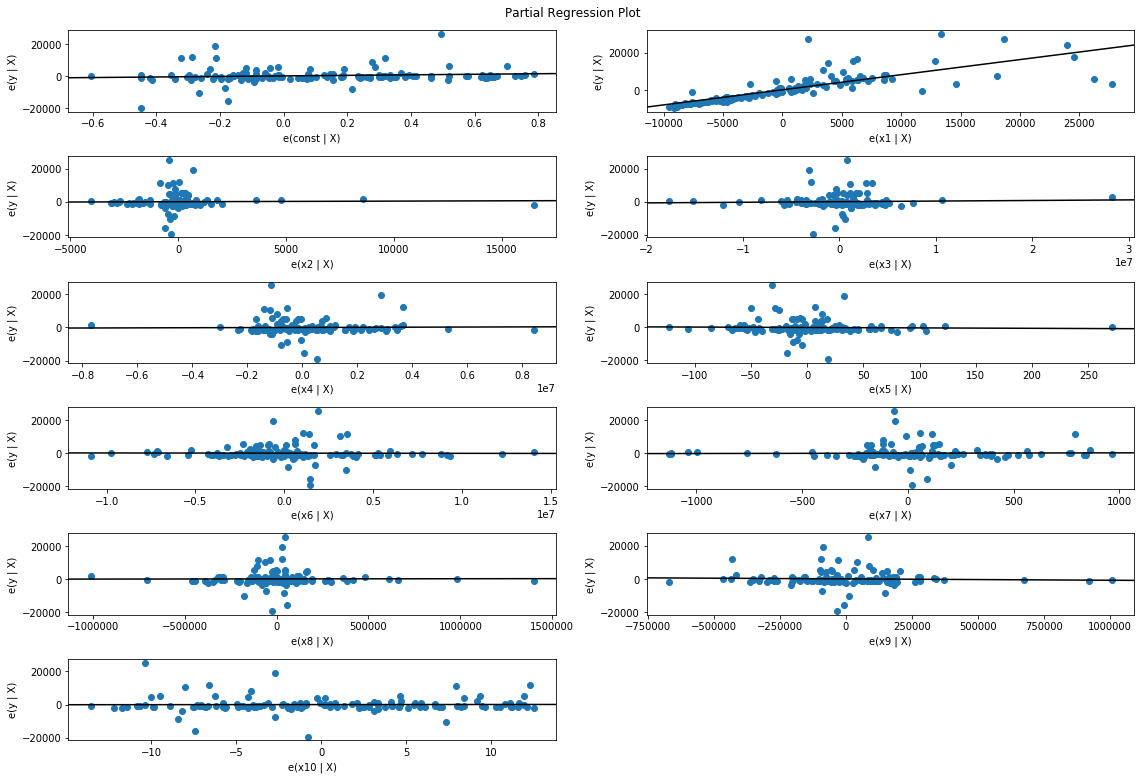

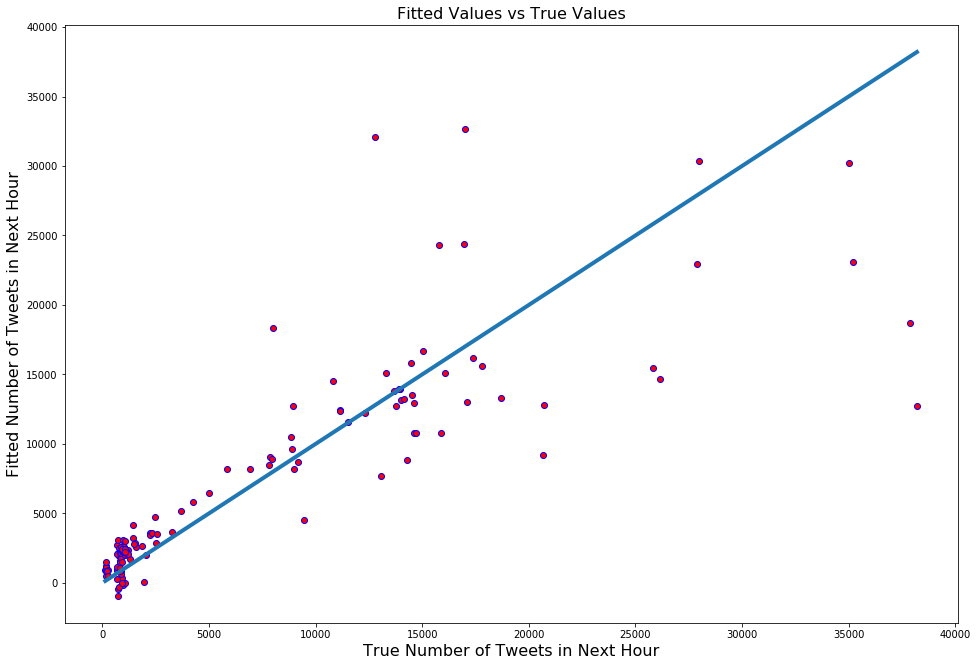

In [21]:
import matplotlib.pyplot as plt
input_arr = []
from sklearn.model_selection import train_test_split
input_arr = []
for index in df.index:
    input_arr.append(df.loc[index, '# of Tweets':'Time of day'].values)
input_arr.pop()#delete last row
input_arr = sm.add_constant(input_arr)
# print(input_arr)
output_arr = df.loc[df.index[1]:, '# of Tweets'].values #from second row to last row
# print(output_arr)

# input_arrinput_arrst, output_arr, output_arr = train_test_split(input_arr, output_arr, test_size=0.1, random_state=42,shuffle=False)

model = sm.OLS(output_arr, input_arr)
results = model.fit()
output_predicted = results.predict(input_arr)
def rmse(predictions, targets):
    return ((predictions - targets) ** 2).mean()

res = model.fit()

print(res.summary())
print('#'*50)

print("MSE= ", (rmse(output_predicted, output_arr)))
print("RMSE= ", np.sqrt(rmse(output_predicted, output_arr)))
print('#'*50)
print("T-values:")
for i in range(len(res.tvalues)):
  print('column',i+1,res.tvalues[i])
print('#'*50)
print("P-Values: ")
for i in range(len(res.pvalues)):
  print('column',i+1,res.pvalues[i])
print('#'*50)

fig = plt.figure(figsize=(16,11))
fig = sm.graphics.plot_partregress_grid(results, fig=fig)
fig.show()
# plot fitted values vs true values
plt.figure(figsize=(16,11))
plt.scatter(output_arr, output_predicted, color='red', edgecolors='b')
plt.plot([output_arr.min(), output_arr.max()], [output_arr.min(), output_arr.max()], lw=4)
plt.ylabel('Fitted Number of Tweets in Next Hour', fontsize = 16)
plt.xlabel('True Number of Tweets in Next Hour', fontsize = 16)
plt.title('Fitted Values vs True Values', fontsize = 16)
plt.show()

**Everything Combined**

In [0]:
Total_tweet=0
tweet_time=[]
follow_count=[]
retweet_count=[]

status_count=[]
hashtag_count=[]
friends_count=[]
mentions_TF=[]
favourites_count=[]
url_ratio_count=[]


with open('./ECE219_tweet_data/tweets_#superbowl.txt','r') as f:
#   read_data= f.read()
  for line in f:
    json_object=json.loads(line)
    Total_tweet += 1
    follow_count.append(json_object['author']['followers'])
    datetime_object = json_object['citation_date']
    retweet_count.append(json_object['metrics']['citations']['total'])
    tweet_time.append(datetime_object)
    
    ### new features:
    status_count.append(json_object['tweet']['user']['statuses_count'])
    hashtag_count.append(len(json_object['tweet']['entities']['hashtags']))
    friends_count.append(json_object['tweet']['user']['friends_count'])

    if not json_object['tweet']['entities']['user_mentions'] :
      mentions_TF.append(0)
    else:
      mentions_TF.append(1)

    url_ratio_count.append(len(json_object['tweet']['entities']['urls']))
    favourites_count.append(json_object['tweet']['user']['favourites_count'])
    

f.closed

#####go Hawks
tweet_time_gh=[]
follow_count_gh=[]
retweet_count_gh=[]

status_count_gh=[]
hashtag_count_gh=[]
friends_count_gh=[]
mentions_TF_gh=[]
favourites_count_gh=[]
url_ratio_count_gh=[]


with open('./ECE219_tweet_data/tweets_#gohawks.txt','r') as f:
#   read_data= f.read()
  for line in f:
    json_object=json.loads(line)
    Total_tweet += 1
    follow_count_gh.append(json_object['author']['followers'])
    datetime_object = json_object['citation_date']
    retweet_count_gh.append(json_object['metrics']['citations']['total'])
    tweet_time_gh.append(datetime_object)
    
    ### new features:
    status_count_gh.append(json_object['tweet']['user']['statuses_count'])
    hashtag_count_gh.append(len(json_object['tweet']['entities']['hashtags']))
    friends_count_gh.append(json_object['tweet']['user']['friends_count'])

    if not json_object['tweet']['entities']['user_mentions'] :
      mentions_TF_gh.append(0)
    else:
      mentions_TF_gh.append(1)

    url_ratio_count_gh.append(len(json_object['tweet']['entities']['urls']))
    favourites_count_gh.append(json_object['tweet']['user']['favourites_count'])
    

f.closed

######go pats
Total_tweet=0
tweet_time_gp=[]
follow_count_gp=[]
retweet_count_gp=[]

status_count_gp=[]
hashtag_count_gp=[]
friends_count_gp=[]
mentions_TF_gp=[]
favourites_count_gp=[]
url_ratio_count_gp=[]


with open('./ECE219_tweet_data/tweets_#gopatriots.txt','r') as f:
#   read_data= f.read()
  for line in f:
    json_object=json.loads(line)
    Total_tweet += 1
    follow_count_gp.append(json_object['author']['followers'])
    datetime_object = json_object['citation_date']
    retweet_count_gp.append(json_object['metrics']['citations']['total'])
    tweet_time_gp.append(datetime_object)
    
    ### new features:
    status_count_gp.append(json_object['tweet']['user']['statuses_count'])
    hashtag_count_gp.append(len(json_object['tweet']['entities']['hashtags']))
    friends_count_gp.append(json_object['tweet']['user']['friends_count'])

    if not json_object['tweet']['entities']['user_mentions'] :
      mentions_TF_gp.append(0)
    else:
      mentions_TF_gp.append(1)

    url_ratio_count_gp.append(len(json_object['tweet']['entities']['urls']))
    favourites_count_gp.append(json_object['tweet']['user']['favourites_count'])
    

f.closed


#####nfl
Total_tweet=0
tweet_time_nfl=[]
follow_count_nfl=[]
retweet_count_nfl=[]

status_count_nfl=[]
hashtag_count_nfl=[]
friends_count_nfl=[]
mentions_TF_nfl=[]
favourites_count_nfl=[]
url_ratio_count_nfl=[]


with open('./ECE219_tweet_data/tweets_#nfl.txt','r') as f:
#   read_data= f.read()
  for line in f:
    json_object=json.loads(line)
    Total_tweet += 1
    follow_count_nfl.append(json_object['author']['followers'])
    datetime_object = json_object['citation_date']
    retweet_count_nfl.append(json_object['metrics']['citations']['total'])
    tweet_time_nfl.append(datetime_object)
    
    ### new features:
    status_count_nfl.append(json_object['tweet']['user']['statuses_count'])
    hashtag_count_nfl.append(len(json_object['tweet']['entities']['hashtags']))
    friends_count_nfl.append(json_object['tweet']['user']['friends_count'])

    if not json_object['tweet']['entities']['user_mentions'] :
      mentions_TF_nfl.append(0)
    else:
      mentions_TF_nfl.append(1)

    url_ratio_count_nfl.append(len(json_object['tweet']['entities']['urls']))
    favourites_count_nfl.append(json_object['tweet']['user']['favourites_count'])
    

f.closed
#####patriots
Total_tweet_pat=0
tweet_time_pat=[]
follow_count_pat=[]
retweet_count_pat=[]

status_count_pat=[]
hashtag_count_pat=[]
friends_count_pat=[]
mentions_TF_pat=[]
favourites_count_pat=[]
url_ratio_count_pat=[]


with open('./ECE219_tweet_data/tweets_#patriots.txt','r') as f:
#   read_data= f.read()
  for line in f:
    json_object=json.loads(line)
    Total_tweet += 1
    follow_count_pat.append(json_object['author']['followers'])
    datetime_object = json_object['citation_date']
    retweet_count_pat.append(json_object['metrics']['citations']['total'])
    tweet_time_pat.append(datetime_object)
    
    ### new features:
    status_count_pat.append(json_object['tweet']['user']['statuses_count'])
    hashtag_count_pat.append(len(json_object['tweet']['entities']['hashtags']))
    friends_count_pat.append(json_object['tweet']['user']['friends_count'])

    if not json_object['tweet']['entities']['user_mentions'] :
      mentions_TF_pat.append(0)
    else:
      mentions_TF_pat.append(1)

    url_ratio_count_pat.append(len(json_object['tweet']['entities']['urls']))
    favourites_count_pat.append(json_object['tweet']['user']['favourites_count'])
    

f.closed

#sb49
Total_tweet=0
tweet_time_sb49=[]
follow_count_sb49=[]
retweet_count_sb49=[]

status_count_sb49=[]
hashtag_count_sb49=[]
friends_count_sb49=[]
mentions_TF_sb49=[]
favourites_count_sb49=[]
url_ratio_count_sb49=[]


with open('./ECE219_tweet_data/tweets_#sb49.txt','r') as f:
#   read_data= f.read()
  for line in f:
    json_object=json.loads(line)
    Total_tweet += 1
    follow_count_sb49.append(json_object['author']['followers'])
    datetime_object = json_object['citation_date']
    retweet_count_sb49.append(json_object['metrics']['citations']['total'])
    tweet_time_sb49.append(datetime_object)
    
    ### new features:
    status_count_sb49.append(json_object['tweet']['user']['statuses_count'])
    hashtag_count_sb49.append(len(json_object['tweet']['entities']['hashtags']))
    friends_count_sb49.append(json_object['tweet']['user']['friends_count'])

    if not json_object['tweet']['entities']['user_mentions'] :
      mentions_TF_sb49.append(0)
    else:
      mentions_TF_sb49.append(1)

    url_ratio_count_sb49.append(len(json_object['tweet']['entities']['urls']))
    favourites_count_sb49.append(json_object['tweet']['user']['favourites_count'])
    

f.closed

In [0]:
print(len(tweet_time))
print(len(tweet_time_gh))
print(len(tweet_time_gp))
print(len(tweet_time_nfl))
print(len(tweet_time_pat))
print(len(tweet_time_sb49))

In [0]:
min_time_sb=np.min(tweet_time)
min_time_gh=np.min(tweet_time_gh)
min_time_gp=np.min(tweet_time_gp)
min_time_nfl=np.min(tweet_time_nfl)
min_time_pat=np.min(tweet_time_pat)
min_time_sb49=np.min(tweet_time_sb49)


max_time_sb=np.max(tweet_time)
max_time_gh=np.max(tweet_time_gh)
max_time_gp=np.max(tweet_time_gp)
max_time_nfl=np.max(tweet_time_nfl)
max_time_pat=np.max(tweet_time_pat)
max_time_sb49=np.max(tweet_time_sb49)



minimum_time_unix=[min_time_sb,min_time_gh,min_time_gp,min_time_nfl,min_time_pat,min_time_sb49,max_time_sb,max_time_gh,max_time_gp,max_time_nfl,max_time_pat,max_time_sb49]
print(len(minimum_time_unix))
np.sort(minimum_time_unix, axis=0)

In [0]:
import pytz
import numpy as np
from datetime import timedelta



sortTime= np.sort(minimum_time_unix, axis=0)


mint=datetime.datetime.fromtimestamp(sortTime[0])
maxt=datetime.datetime.fromtimestamp(sortTime[-1])
timerange=maxt-mint
print("True range in hour : ",timerange.total_seconds()/(60*60))
print("Total bins = ",np.ceil(timerange.total_seconds()/(60*60)))
total_time_range= timerange.total_seconds()/(60*60)
print("Average number of tweets per hour", len(tweet_time)/total_time_range)



pst_tz = pytz.timezone('America/Los_Angeles')

min_tweet_time= np.min(tweet_time)
pstTimeDelta    = datetime.timedelta(hours=-8)
tzObject        = datetime.timezone(pstTimeDelta, name="PST")

before_time=datetime.datetime(2015,2,1,8,0,0,0,tzObject)
after_time= datetime.datetime(2015,2,1,20,0,0,0,tzObject)



arbTime1=datetime.datetime(2015,2,1,7,59)#20
arbTime2=datetime.datetime(2015,2,1,8,0)#21
arbTime3=datetime.datetime(2015,2,1,8,4,59)#21
arbTime4=datetime.datetime(2015,2,1,8,5)#22
arbTime5= datetime.datetime(2015,2,1,19,59)




print(arbTime1)
print(arbTime2)
print(arbTime3)
some_arb_time= [arbTime1, arbTime2, arbTime3, arbTime4,arbTime5]


# for element in some_arb_time:
#   if ((before_time-element).total_seconds()/(60*60) <=0) and ((element-after_time).total_seconds()/(60*60))<0:
#     print('#'*20)
#     print("in between this", element)
#     print('#'*20)
#   if (element- after_time).total_seconds()/(60*60) >=0:
#     print("this time is greater than after time", element)
#   if (before_time-element).total_seconds()/(60*60) >0:
#     print("this time is before superbowl time",element)
    
    
    
    
    
print("Before date/time",before_time)
print("Before date/time",after_time)
# print("Before time- maxt",(arbTime2-after_time).total_seconds()/(60*60))
# print(after_time-maxt)
minute_of_min= datetime.datetime.fromtimestamp(min_tweet_time, pst_tz).minute
second_of_min= datetime.datetime.fromtimestamp(min_tweet_time, pst_tz).second

timeD=timedelta(hours=0, minutes=minute_of_min,seconds= second_of_min)
# print(timedelta(hours=0, minutes=minute_of_min,seconds= second_of_min))
# print(datetime.datetime.fromtimestamp(min_tweet_time, pst_tz)-timeD)
min_time_conv=datetime.datetime.fromtimestamp(min_tweet_time,pst_tz)-timeD


In [0]:

min_time_conv=datetime.datetime.fromtimestamp(min_tweet_time,pst_tz)-timeD
print(datetime.datetime.fromtimestamp(min_tweet_time,pst_tz))
print(min_time_conv)

# print(some_arb_time)
tweet_window=[]



arbTime1=datetime.datetime(2015,1,14,9,13,0,0,tzObject)
arbTime2=datetime.datetime(2015,2,1,7,1,0,0,tzObject)
arbTime3=datetime.datetime(2015,2,1,9,0,0,0,tzObject)
arbTime4=datetime.datetime(2015,2,1,8,0,0,0,tzObject)
arbTime5= datetime.datetime(2015,2,1,19,59,0,0,tzObject)
arbTime6= datetime.datetime(2015,2,1,20,0,1,0,tzObject)
arbTime7= datetime.datetime(2015,2,7,10,0,0,0,tzObject)

some_arb_time= [arbTime1, arbTime2, arbTime3, arbTime4,arbTime5,arbTime6,arbTime7]

# conv_tweet_time=[]
# for element in tweet_time:
#   conv_tweet_time.append(datetime.datetime.fromtimestamp(element, pst_tz))
  
bin_arr=[]
for myelement in tweet_time:
  element=datetime.datetime.fromtimestamp(myelement, pst_tz)
  if ((before_time-element).total_seconds()/(60*60) <=0) and ((element-after_time).total_seconds()/(60*60))<0: #during superbowl
    
    mybin = (before_time - min_time_conv).total_seconds()/(60*60*24)*24
#     print("date",date_delta)
#     print("before time", before_time)
#     print("first time", min_time_conv)
    
#     mybin = int(min_time_conv.hour)
#     mybin= int((element-min_time_conv).total_seconds()/(60*60))
#     print(mybin)
#     print("hour division bin", int(element.hour-8)*12)
#     print("bin during superbowl",int(element.minute/5))
    this_bin = int(mybin + (int(element.hour-8)*12)+(int(element.minute/5)))
#     print(element)
# #     print("mybin:",mybin)
#     print("SuperBowl time:  This corresponding bin number is", this_bin)
    bin_arr.append(this_bin)
  if (element- after_time).total_seconds()/(60*60) >=0:#after superbowl
    after_my_bin = int(int((element - after_time).total_seconds()/(60*60)) + (before_time - min_time_conv).total_seconds()/(60*60*24)*24 + 144)
#     after_my_bin=int((element - after_time).total_seconds()/(60*60))+144+ (after_time - min_time_conv).total_seconds()/(60*60*24)*24
#     mybin= int((element-min_time_conv).total_seconds()/(60*60))+ after_my_bin
#     print("ele-mintime",element-min_time_conv)
#     print(element)
#     print("bin number after the superbowl", after_my_bin)
    bin_arr.append(after_my_bin)
  if (before_time-element).total_seconds()/(60*60) >0:#before superBowl
    mybin= int((element-min_time_conv).total_seconds()/(60*60))
    bin_arr.append(mybin)
#     print(element)
#     print("bin number is before superbowl",mybin)
  

In [0]:
lasttweet=(datetime.datetime.fromtimestamp(sortTime[-1],pst_tz))
firstweet=(datetime.datetime.fromtimestamp(sortTime[0],pst_tz))
print(lasttweet)
print(firstweet)
print((lasttweet-firstweet).total_seconds()/(3600)+144-12)
print(np.max(bin_arr))

In [0]:

bin_arr_gh=[]
for myelement in tweet_time_gh:
  element=datetime.datetime.fromtimestamp(myelement, pst_tz)
  if ((before_time-element).total_seconds()/(60*60) <=0) and ((element-after_time).total_seconds()/(60*60))<0: #during superbowl
    mybin = (before_time - min_time_conv).total_seconds()/(60*60*24)*24
    this_bin = int(mybin + (int(element.hour-8)*12)+(int(element.minute/5)))
    bin_arr_gh.append(this_bin)
  if (element- after_time).total_seconds()/(60*60) >=0:#after superbowl
    after_my_bin = int(int((element - after_time).total_seconds()/(60*60)) + (before_time - min_time_conv).total_seconds()/(60*60*24)*24 + 144)
    bin_arr_gh.append(after_my_bin)
  if (before_time-element).total_seconds()/(60*60) >0:#before superBowl
    mybin= int((element-min_time_conv).total_seconds()/(60*60))
    bin_arr_gh.append(mybin)
    
bin_arr_gp=[]
for myelement in tweet_time_gp:
  element=datetime.datetime.fromtimestamp(myelement, pst_tz)
  if ((before_time-element).total_seconds()/(60*60) <=0) and ((element-after_time).total_seconds()/(60*60))<0: #during superbowl
    mybin = (before_time - min_time_conv).total_seconds()/(60*60*24)*24
    this_bin = int(mybin + (int(element.hour-8)*12)+(int(element.minute/5)))
    bin_arr_gp.append(this_bin)
  if (element- after_time).total_seconds()/(60*60) >=0:#after superbowl
    after_my_bin = int(int((element - after_time).total_seconds()/(60*60)) + (before_time - min_time_conv).total_seconds()/(60*60*24)*24 + 144)
    bin_arr_gp.append(after_my_bin)
  if (before_time-element).total_seconds()/(60*60) >0:#before superBowl
    mybin= int((element-min_time_conv).total_seconds()/(60*60))
    bin_arr_gp.append(mybin)
    
bin_arr_nfl=[]
for myelement in tweet_time_nfl:
  element=datetime.datetime.fromtimestamp(myelement, pst_tz)
  if ((before_time-element).total_seconds()/(60*60) <=0) and ((element-after_time).total_seconds()/(60*60))<0: #during superbowl
    mybin = (before_time - min_time_conv).total_seconds()/(60*60*24)*24
    this_bin = int(mybin + (int(element.hour-8)*12)+(int(element.minute/5)))
    bin_arr_nfl.append(this_bin)
  if (element- after_time).total_seconds()/(60*60) >=0:#after superbowl
    after_my_bin = int(int((element - after_time).total_seconds()/(60*60)) + (before_time - min_time_conv).total_seconds()/(60*60*24)*24 + 144)
    bin_arr_nfl.append(after_my_bin)
  if (before_time-element).total_seconds()/(60*60) >0:#before superBowl
    mybin= int((element-min_time_conv).total_seconds()/(60*60))
    bin_arr_nfl.append(mybin)
    
bin_arr_pat=[]
for myelement in tweet_time_pat:
  element=datetime.datetime.fromtimestamp(myelement, pst_tz)
  if ((before_time-element).total_seconds()/(60*60) <=0) and ((element-after_time).total_seconds()/(60*60))<0: #during superbowl
    mybin = (before_time - min_time_conv).total_seconds()/(60*60*24)*24
    this_bin = int(mybin + (int(element.hour-8)*12)+(int(element.minute/5)))
    bin_arr_pat.append(this_bin)
  if (element- after_time).total_seconds()/(60*60) >=0:#after superbowl
    after_my_bin = int(int((element - after_time).total_seconds()/(60*60)) + (before_time - min_time_conv).total_seconds()/(60*60*24)*24 + 144)
    bin_arr_pat.append(after_my_bin)
  if (before_time-element).total_seconds()/(60*60) >0:#before superBowl
    mybin= int((element-min_time_conv).total_seconds()/(60*60))
    bin_arr_pat.append(mybin)
    
bin_arr_sb49=[]
for myelement in tweet_time_sb49:
  element=datetime.datetime.fromtimestamp(myelement, pst_tz)
  if ((before_time-element).total_seconds()/(60*60) <=0) and ((element-after_time).total_seconds()/(60*60))<0: #during superbowl
    mybin = (before_time - min_time_conv).total_seconds()/(60*60*24)*24
    this_bin = int(mybin + (int(element.hour-8)*12)+(int(element.minute/5)))
    bin_arr_sb49.append(this_bin)
  if (element- after_time).total_seconds()/(60*60) >=0:#after superbowl
    after_my_bin = int(int((element - after_time).total_seconds()/(60*60)) + (before_time - min_time_conv).total_seconds()/(60*60*24)*24 + 144)
    bin_arr_sb49.append(after_my_bin)
  if (before_time-element).total_seconds()/(60*60) >0:#before superBowl
    mybin= int((element-min_time_conv).total_seconds()/(60*60))
    bin_arr_sb49.append(mybin)

In [0]:
print(np.max(bin_arr))
print(np.max(bin_arr_gh))

print(np.max(bin_arr_gp))
print(np.max(bin_arr_nfl))
print(np.max(bin_arr_pat))
print(np.max(bin_arr_sb49))

In [0]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(bin_arr, bins=np.max(bin_arr))
plt.title('superbowl')
plt.show()
plt.figure()
plt.hist(bin_arr_gh, bins=np.max(bin_arr_gh))
plt.title('go hawks')
plt.show()
plt.figure()
plt.hist(bin_arr_gp, bins=np.max(bin_arr_gp))
plt.title('go patriots')
plt.show()
plt.figure()
plt.hist(bin_arr_pat, bins=np.max(bin_arr_pat))
plt.title('go pat')
plt.show()
plt.figure()
plt.hist(bin_arr_nfl, bins=np.max(bin_arr_nfl))
plt.title('nfl')
plt.show()
plt.figure()
plt.hist(bin_arr_sb49, bins=np.max(bin_arr_sb49))
plt.title('sb49')
plt.show()

In [0]:
#superbowl
retweet_array_window=[]
retweet_array_window_gh=[]
retweet_array_window_gp=[]
retweet_array_window_pat=[]
retweet_array_window_nfl=[]
retweet_array_window_sb49=[]
for i in range(np.max(bin_arr)+1):
  retweet_array_window.append(np.where(np.asarray(bin_arr,dtype=int)==i))
  retweet_array_window_gh.append(np.where(np.asarray(bin_arr_gh,dtype=int)==i))
  retweet_array_window_gp.append(np.where(np.asarray(bin_arr_gp,dtype=int)==i))
  retweet_array_window_pat.append(np.where(np.asarray(bin_arr_pat,dtype=int)==i))
  retweet_array_window_nfl.append(np.where(np.asarray(bin_arr_nfl,dtype=int)==i))
  retweet_array_window_sb49.append(np.where(np.asarray(bin_arr_sb49,dtype=int)==i))


In [0]:
print((retweet_array_window)[0][0])
print((retweet_array_window_gh)[0][0])

In [0]:
def getinfo(window,retweet,follow,status,hashtag, friends, mentions,favourites, time ):
  
  my_tweet_count=[]
  my_retweet_count=[]
  my_follow_count=[]
  my_max_follower_count=[]
  my_time_of_day=[]

  my_status_count=[] #get how many status in certain hour
  my_hashtag_count=[] #get how many hashtags in certain hour
  my_friends_count=[] #max friend count
  my_mentions_TF=[] #
  my_favourites_count=[]

  for element in window:
    for innerelement in element:
  #     print(innerelement)[]
      item_tweet=0
      item=0
      item1=0
      maxitem2=0
      timeitem=0

      item_status=0
      item_hashtag=0
      item_friends=0
      item_mentions=0
      item_favourites=0
      for indexlayer in innerelement:  
        item=retweet[indexlayer]+item
        item1=follow[indexlayer]+item1
        timeitem=datetime.datetime.fromtimestamp(time[indexlayer], pst_tz).hour     
        item_status= status[indexlayer]+ item_status
        item_hashtag=hashtag[indexlayer]+ item_hashtag
        item_friends=item_friends+ friends[indexlayer]
        item_mentions=item_mentions+ mentions[indexlayer]
        item_favourites=item_favourites+ favourites[indexlayer] 
        if maxitem2 < follow[indexlayer]:
          maxitem2= follow[indexlayer]
      my_time_of_day.append(timeitem)   
      my_max_follower_count.append(maxitem2)  
      my_retweet_count.append(item)
      my_follow_count.append(item1)

      my_status_count.append(item_status)
      my_hashtag_count.append(item_hashtag)
      my_friends_count.append(item_friends)
      my_mentions_TF.append(item_mentions)
      my_favourites_count.append(item_favourites)
  return my_retweet_count, my_follow_count, my_max_follower_count, my_time_of_day,my_status_count, my_hashtag_count, my_friends_count, my_mentions_TF, my_favourites_count


a1, a2,a3,a4,a5,a6,a7,a8,a9= getinfo(retweet_array_window,retweet_count,follow_count,
                                     status_count,hashtag_count,friends_count,
                                     mentions_TF,favourites_count,tweet_time)

b1, b2,b3,b4,b5,b6,b7,b8,b9= getinfo(retweet_array_window_gh,retweet_count_gh,
                                     follow_count_gh,status_count_gh,hashtag_count_gh,
                                     friends_count_gh,mentions_TF_gh,favourites_count_gh,
                                     tweet_time_gh)

c1, c2,c3,c4,c5,c6,c7,c8,c9= getinfo(retweet_array_window_gp,retweet_count_gp,
                                     follow_count_gp,status_count_gp,hashtag_count_gp,
                                     friends_count_gp,mentions_TF_gp,favourites_count_gp,
                                     tweet_time_gp)

d1, d2,d3,d4,d5,d6,d7,d8,d9= getinfo(retweet_array_window_pat,retweet_count_pat,follow_count_pat,
                                     status_count_pat,hashtag_count_pat,friends_count_pat,
                                     mentions_TF_pat,favourites_count_pat,tweet_time_pat)

e1, e2,e3,e4,e5,e6,e7,e8,e9= getinfo(retweet_array_window_nfl,retweet_count_nfl,follow_count_nfl,
                                     status_count_nfl,hashtag_count_nfl,friends_count_nfl,
                                     mentions_TF_nfl,favourites_count_nfl,tweet_time_nfl)

f1, f2,f3,f4,f5,f6,f7,f8,f9= getinfo(retweet_array_window_sb49,retweet_count_sb49,follow_count_sb49,
                                     status_count_sb49,hashtag_count_sb49,friends_count_sb49,
                                     mentions_TF_sb49,favourites_count_sb49,tweet_time_sb49)
n_tweet= np.histogram(bin_arr,bins=np.max(bin_arr)+1)
n_tweet_gh= np.histogram(bin_arr_gh,bins=np.max(bin_arr)+1)
n_tweet_gp= np.histogram(bin_arr_gp,bins=np.max(bin_arr)+1)
n_tweet_pat= np.histogram(bin_arr_pat,bins=np.max(bin_arr)+1)
n_tweet_nfl= np.histogram(bin_arr_nfl,bins=np.max(bin_arr)+1)
n_tweet_sb49= np.histogram(bin_arr_sb49,bins=np.max(bin_arr)+1)

In [0]:
# print(a2[0])
# print(b2[0])
# print(c2[0])
# print(d2[0])
# print(e2[0])
# print(f2[0])
# print('#'*20)
# print(a2[1])
# print(b2[1])
# print(c2[1])
# print(d2[1])
# print(e2[1])
# print(f2[1])
agg_tweet= np.add(np.add(np.add(n_tweet[0],n_tweet_gh[0]),
                         np.add(n_tweet_gp[0],n_tweet_nfl[0])),
                  np.add(n_tweet_pat[0],n_tweet_sb49[0]))

agg_retweet= np.add(np.add(np.add(a1,b1),np.add(c1,d1)),np.add(e1,f1))
agg_num_follower=np.add(np.add(np.add(a2,b2),np.add(c2,d2)),np.add(e2,f2))
# print(agg_num_follower[0:10])
agg_max_follower=[]
for i in range(len(retweet_array_window)):
  agg_max_follower.append(np.max([a2[i],b2[i],c2[i],d2[i],e2[i]]))
agg_total_status=np.add(np.add(np.add(a5,b5),np.add(c5,d5)),np.add(e5,f5))
agg_total_hashtags=np.add(np.add(np.add(a6,b6),np.add(c6,d6)),np.add(e6,f6))
agg_num_friends=np.add(np.add(np.add(a7,b7),np.add(c7,d7)),np.add(e7,f7))
agg_num_mentions=np.add(np.add(np.add(a8,b8),np.add(c8,d8)),np.add(e8,f8))
agg_num_fav=np.add(np.add(np.add(a9,b9),np.add(c9,d9)),np.add(e9,f9))

In [0]:
# n_tweet= np.histogram(bin_arr,bins=np.max(bin_arr)+1)
# n_tweet= np.histogram(bin_arr,bins=np.max(bin_arr)+1)
# n_tweet= np.histogram(bin_arr,bins=np.max(bin_arr)+1)
# n_tweet= np.histogram(bin_arr,bins=np.max(bin_arr)+1)
# n_tweet= np.histogram(bin_arr,bins=np.max(bin_arr)+1)
# print(len(agg_tweet))            
# print(len(my_retweet_count))
# print(len(my_follow_count))
# print(len(my_max_follower_count))
# print(len(my_time_of_day))

df = pd.DataFrame({
    '# of Tweets' : agg_tweet,
    '# of retweets' : agg_retweet,
    'Sum n followers': agg_num_follower,
    'Max followers': agg_max_follower,
    'Time of day': a4,
    'Status': agg_total_status,
    'Hashtags': agg_total_hashtags,
    'Friends': agg_num_friends,
    'Mentions': agg_num_mentions,
    'Favourites': agg_num_fav
    }, columns = ['# of Tweets', 
                  '# of retweets', 
                  'Sum n followers', 
                  'Max followers', 
                  'Time of day',
                  'Status', 
                  'Hashtags', 
                  'Friends', 
                  'Mentions',
                  'Favourites'])

In [0]:
df.head()

In [0]:
df.head()

In [0]:
import matplotlib.pyplot as plt
input_arr = []
for index in df.index:
    input_arr.append(df.loc[index, '# of Tweets':'Favourites'].values)

input_arr.pop()
# print(input_arr[0:10])
input_arr = sm.add_constant(input_arr)
output_arr = df.loc[df.index[1]:, '# of Tweets'].values

model = sm.OLS(output_arr, input_arr)
results = model.fit()
output_predicted = results.predict(input_arr)
def rmse(predictions, targets):
    return ((predictions - targets) ** 2).mean()
rmse(output_predicted, output_arr)
res = model.fit()

print(res.summary())
print(np.sqrt(rmse(output_predicted, output_arr)))

fig = plt.figure(figsize=(16,11))
fig = sm.graphics.plot_partregress_grid(results, fig=fig)
fig.show()
# plot fitted values vs true values
plt.figure(figsize=(16,11))
plt.scatter(output_arr, output_predicted, color='red', edgecolors='b')
plt.plot([output_arr.min(), output_arr.max()], [output_arr.min(), output_arr.max()], lw=4)
plt.ylabel('Fitted Number of Tweets in Next Hour', fontsize = 16)
plt.xlabel('True Number of Tweets in Next Hour', fontsize = 16)
plt.title('Fitted Values vs True Values', fontsize = 16)
plt.show()